In [109]:
# libaries the import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

# import the dataset

In [110]:
df=pd.read_excel("D:\document\ML Live Flight.xlsx") # parse_dates=['Date_of_Journey']
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [111]:
df.shape

(10683, 11)

# set max columns ti none so we can see all columns from dataset

In [112]:
pd.set_option('display.max_columns',None)

In [113]:
df.head(30)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


# show the first five rows

In [114]:
pd.set_option('display.max_rows',None)

In [115]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# check the basic information of dataset

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# check the value counts of duration column

In [117]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [118]:
df['Date_of_Month']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month # y is presented the e.g.year-19,20 and Y is present year 2019,2020,etc
df['Date_of_Day']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [119]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Month,Date_of_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [120]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [121]:
df.drop(['Date_of_Journey','Route','Additional_Info'],axis=1,inplace=True)

In [122]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Month,Date_of_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [123]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
20:00    185
09:00    184
09:35    183
21:10    180
07:00    167
13:00    164
14:05    163
11:40    161
10:20    159
11:30    158
08:00    152
09:45    140
06:30    140
05:30    138
08:25    136
06:00    131
20:25    125
05:45    122
17:45    118
22:50    114
08:20    114
16:30    109
16:55    109
16:00    100
12:00     98
19:45     97
07:30     95
19:35     94
15:15     91
09:40     90
17:30     90
17:15     89
09:25     85
19:30     83
02:15     80
20:20     79
20:55     78
05:55     78
05:50     78
13:15     76
08:45     75
21:25     74
04:55     73
15:00     72
07:35     72
11:10     71
06:40     71
14:00     71
06:50     70
22:20     70
08:30     69
09:30     68
23:05     66
18:15     66
06:55     66
21:50     66
10:35     63
17:10     63
16:45     62
21:05     61
19:00     59
07:55     59
14:35     58
09:10     57
14:25     56
05:15     56
23:30     55
13:20     53
19:10     53
06:05     53
08:55     52
19:15     51

In [124]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [125]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50


In [126]:
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,3,1,16,50


In [127]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [128]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [129]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


In [130]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
11h         62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
10h 30m     57
22h 55m     57
12h 10m     57
12h 45m     56
5h 45m      54
16h 5m      53
11h 30m     52
7h 20m      52
12h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
26h 55m     44
9h 15m      42
14h 5m      42
13h         42
8h 55m      42
9h 20m      41
20h 10m     41
9h 35m      41
3h 10m      40
17h 5m      40
23h 40m     40
21h 15m     39
26h 35m     39
27h 35m   

# create loop for check duration contains only hour min and if yes add min or hour in it

In [131]:
for i in range(len(df.Duration)):
    if len(df.Duration[i].split()) !=2: # check if duration contains only hour or mins
        if 'h' in df.Duration[i]:
            df.Duration[i] = df.Duration[i].strip() +' '+ '0m' # adds 0 minute
        else:
            df.Duration[i] = '0h' + df.Duration[i] # adds 0 hour
            
            
        

In [132]:
df.Duration

0         2h 50m
1         7h 25m
2         19h 0m
3         5h 25m
4         4h 45m
5         2h 25m
6        15h 30m
7         21h 5m
8        25h 30m
9         7h 50m
10       13h 15m
11        2h 35m
12        2h 15m
13       12h 10m
14        2h 35m
15       26h 35m
16        4h 30m
17       22h 35m
18        23h 0m
19       20h 35m
20        5h 10m
21       15h 20m
22        2h 50m
23        2h 55m
24       13h 20m
25       15h 10m
26        5h 45m
27        5h 55m
28        2h 50m
29        2h 15m
30        2h 15m
31       13h 25m
32        2h 50m
33        22h 0m
34        5h 30m
35       10h 25m
36        5h 15m
37        2h 30m
38        6h 15m
39       11h 55m
40        11h 5m
41        8h 30m
42        22h 5m
43        2h 45m
44        12h 0m
45        2h 50m
46        2h 50m
47        2h 15m
48        16h 5m
49       19h 55m
50        3h 15m
51       25h 20m
52        2h 50m
53         3h 0m
54        2h 50m
55       16h 15m
56        15h 5m
57        2h 15m
58        6h 3

In [133]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


# now extract hour and min from duration column and create two new column Duration_Hour and Duration_Minute

In [134]:
df['Duration_Hour']=df['Duration'].str.split().str[0].str.split("h").str[0]

In [135]:
df['Duration_minute']=df['Duration'].str.split().str[1].str.split("m").str[0]

In [136]:
## Other step 
# df.Duration_Hour =[]
# df.Duration_Minute =[]

# for i in range(len(Duration)):
    # Duration_Hour.append(int(Duration[i].split(sep='h')[0])) # etract hour from duration
    # Duration_Minute.append(int(Duration[i].split(sep='m')[0]split()[1])) # extracts only minutes from duration

## adding Duration_Hour and Duration_Minute list to train_data dataframe

# df['Duration_Hour']=df.Duration_Hour
# df['Duration_Minute']=df.Duration_Minute

In [137]:
# drop the Duration column
df.drop('Duration',axis=1,inplace=True)

In [138]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


# Handling the categorical data

In [139]:
 # check the value counts in Airline

In [140]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Display prices according to Airline

<Axes: xlabel='Airline'>

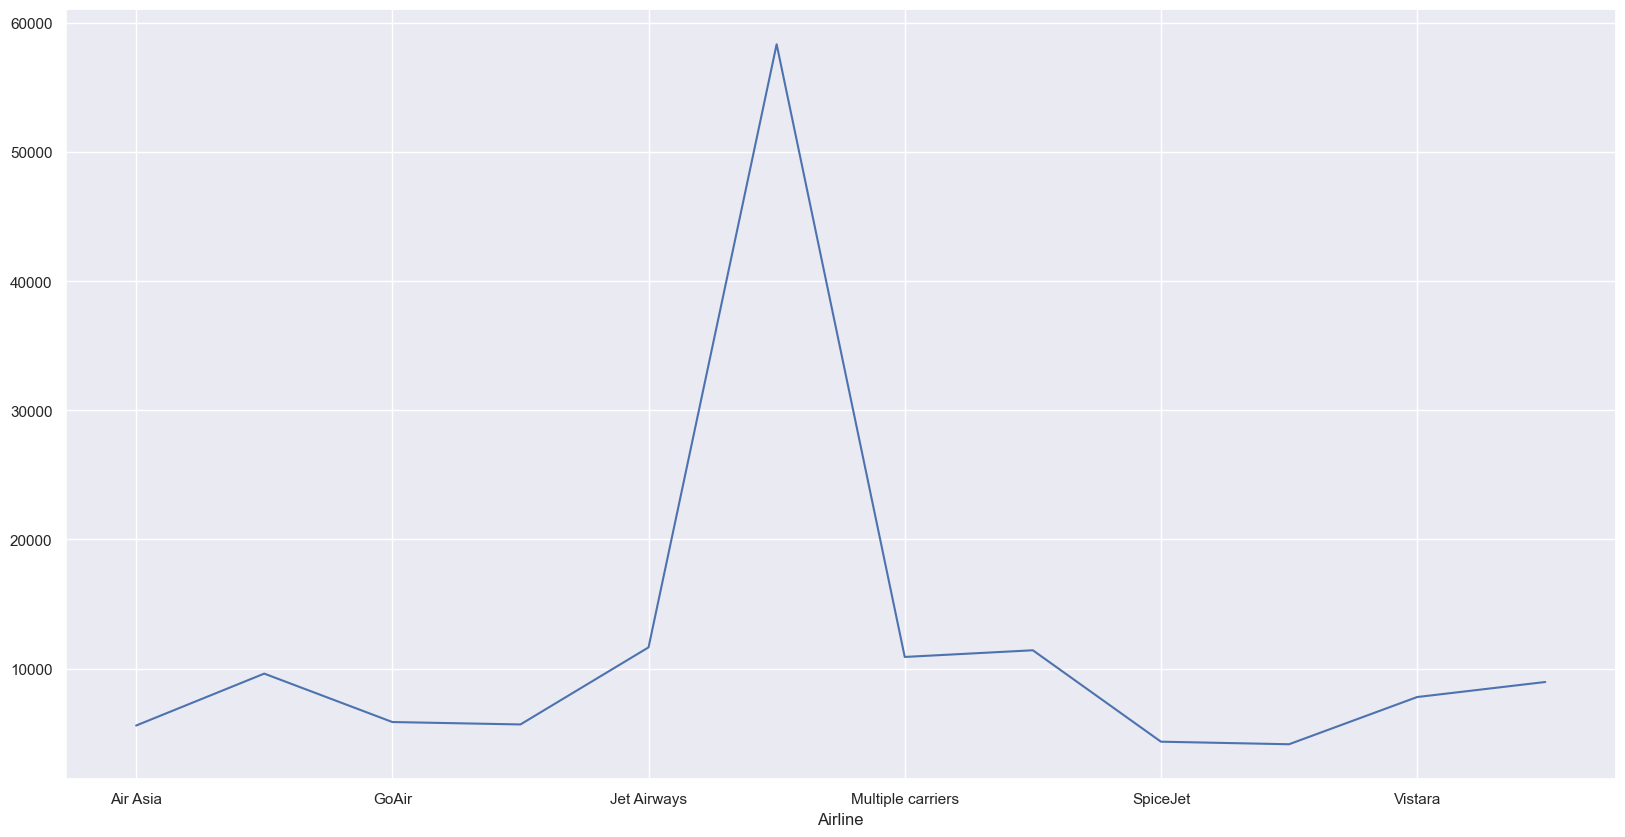

In [141]:
df.groupby('Airline')['Price'].mean().plot(figsize=(20,10))

In [142]:
# check the Average price according to Airline

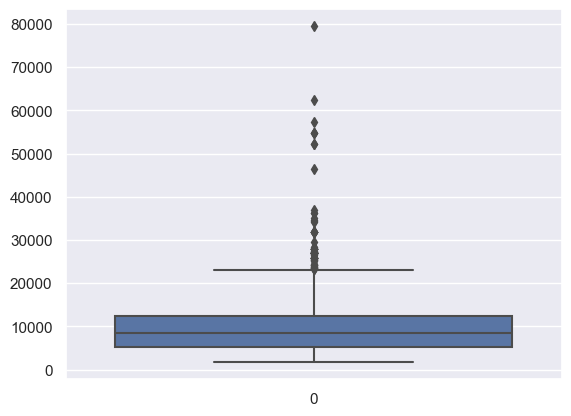

In [143]:
x = df['Airline']

sns.boxplot(df['Price'])
plt.show()


In [144]:
# Airline is Nominal Categorical data we will perform OneHot Encoding

Airline =df['Airline']
Airline =pd.get_dummies(Airline)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [145]:
# check the source values counts
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source'>

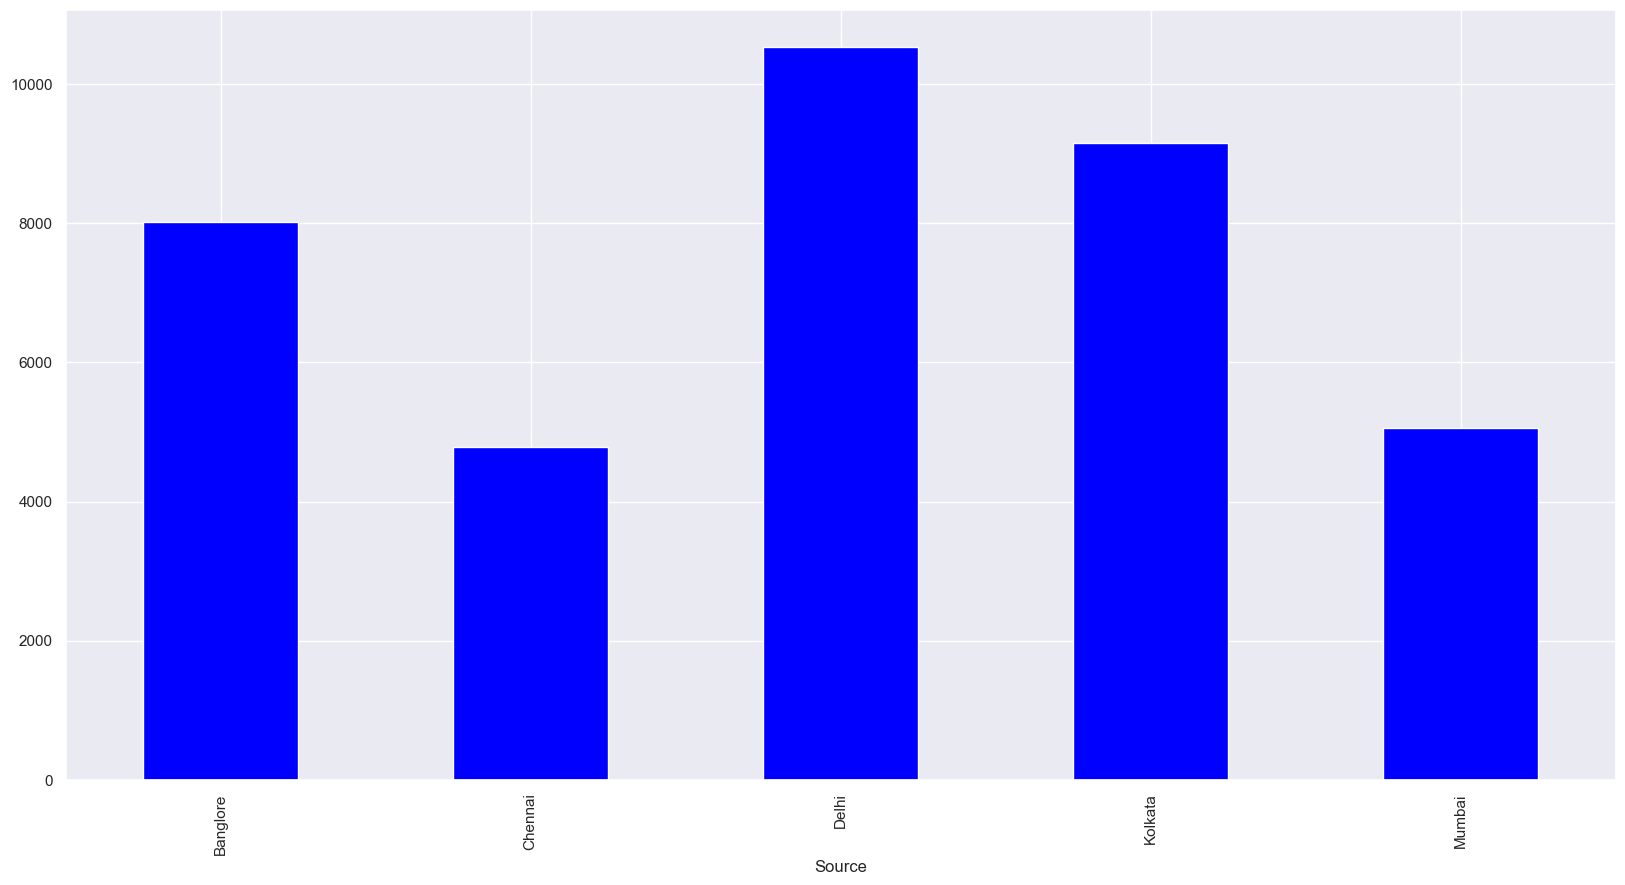

In [146]:
# display average price according to source 
df.groupby('Source')['Price'].mean().plot(figsize=(20,10),kind='bar',color='blue')

In [147]:
Source=df['Source']
Source=pd.get_dummies(Source)
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [148]:
# check the destination value counts
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [149]:
Destination=df['Destination']
Destination=pd.get_dummies(Destination)
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [150]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [151]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [152]:
# now replace categorical value in total_stop with numeric value by manually
a={'non-stop':0,
   '1 stop':1,
   '2 stops':2,
   '3 stops':3,
   '4 stops':4}
df.replace(a,inplace=True)


In [153]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0.0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45


In [154]:
# drop the categorical data
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [155]:
df.head()

,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_minute
0,0.0,3897,3,24,22,20,1,10,2,50
1,2.0,7662,5,1,5,50,13,15,7,25
2,2.0,13882,6,9,9,25,4,25,19,0
3,1.0,6218,5,12,18,5,23,30,5,25
4,1.0,13302,3,1,16,50,21,35,4,45


In [156]:
# Now concatenate all dummy data which we created with our orignal dataset
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [157]:
df.head()

,Total_Stops,Price,Date_of_Month,Date_of_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897,3,24,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2.0,13882,6,9,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1.0,6218,5,12,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1.0,13302,3,1,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  float64
 1   Price                              10683 non-null  int64  
 2   Date_of_Month                      10683 non-null  int64  
 3   Date_of_Day                        10683 non-null  int64  
 4   Dep_Hour                           10683 non-null  int64  
 5   Dep_Minute                         10683 non-null  int64  
 6   Arrival_Hour                       10683 non-null  int64  
 7   Arrival_Minute                     10683 non-null  int64  
 8   Duration_Hour                      10683 non-null  object 
 9   Duration_minute                    10682 non-null  object 
 10  Air Asia                           10683 non-null  uint8  
 11  Air India                          10683 non-null  uin

In [159]:
df.isnull().sum()

Total_Stops                          1
Price                                0
Date_of_Month                        0
Date_of_Day                          0
Dep_Hour                             0
Dep_Minute                           0
Arrival_Hour                         0
Arrival_Minute                       0
Duration_Hour                        0
Duration_minute                      1
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                  

In [160]:
df.dropna(inplace=True)

In [161]:
df.isnull().sum()

Total_Stops                          0
Price                                0
Date_of_Month                        0
Date_of_Day                          0
Dep_Hour                             0
Dep_Minute                           0
Arrival_Hour                         0
Arrival_Minute                       0
Duration_Hour                        0
Duration_minute                      0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                  

# feature selection  or Diamension reduction

In [162]:
# create target and features set
x=df.drop('Price',axis=1)
y=df.Price

<Axes: >

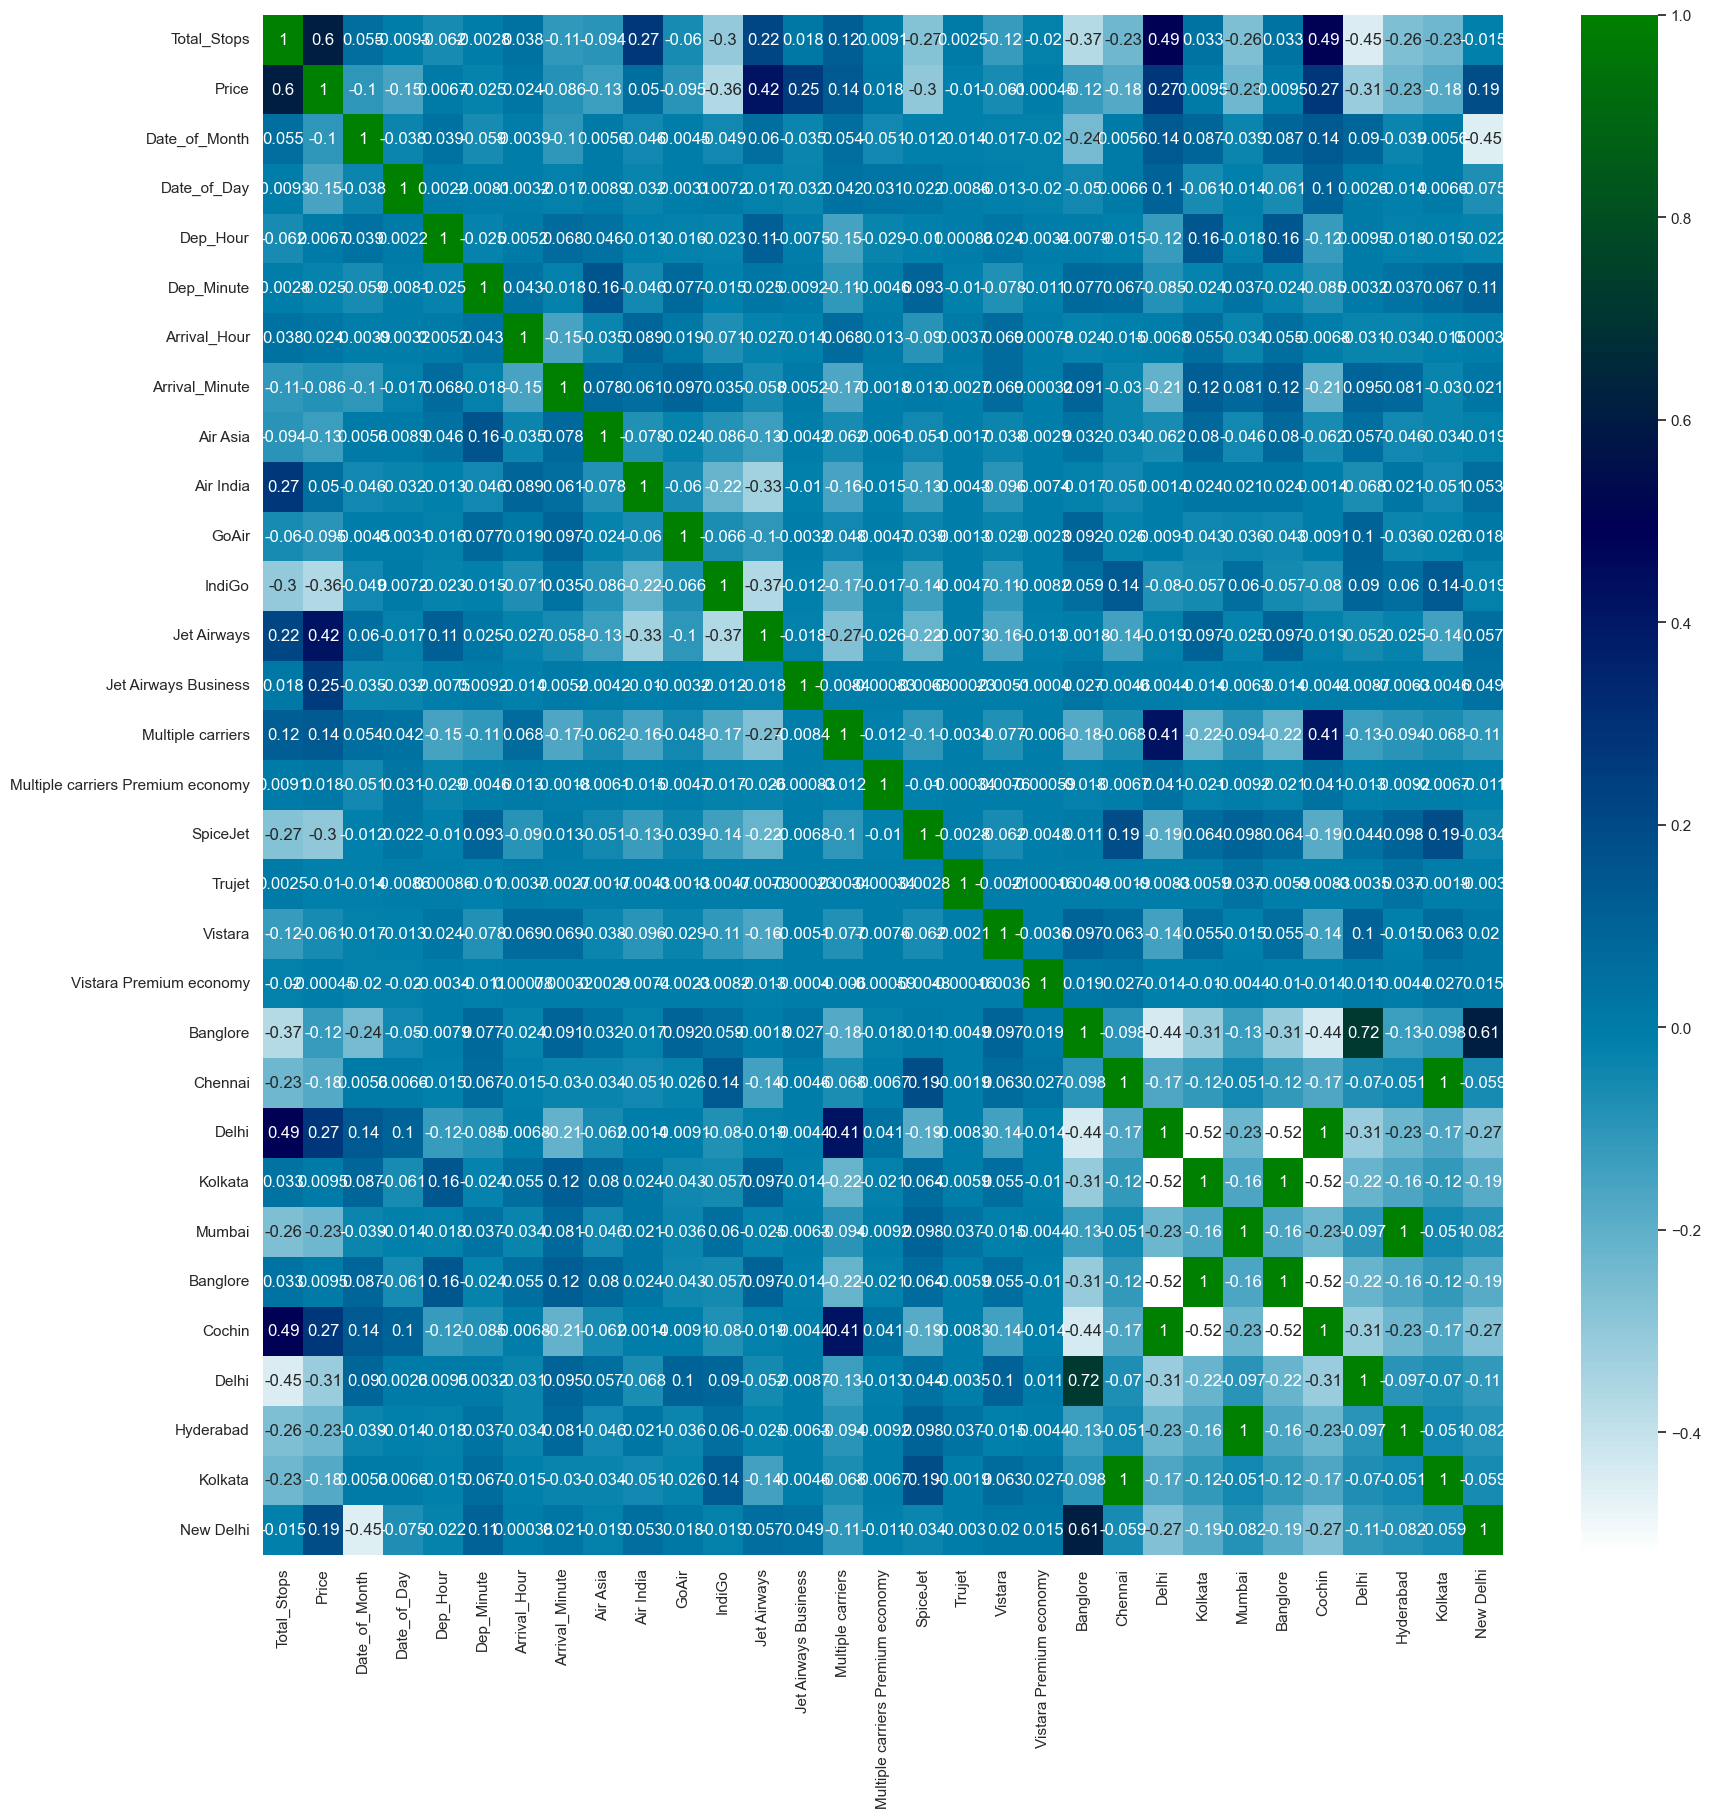

In [163]:
Feature_1=df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(Feature_1,annot=True,cmap='ocean_r')

In [164]:
# Find the important Features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [165]:
# print all features importances
print(selection.feature_importances_)

[2.22574021e-01 5.31405892e-02 1.44375531e-01 2.52822649e-02
 2.09306174e-02 2.79292915e-02 1.87132810e-02 1.21394934e-01
 1.73058365e-02 1.81706707e-03 9.23808016e-03 1.67335560e-03
 1.68410103e-02 1.44124008e-01 6.78492501e-02 1.84211952e-02
 8.31835606e-04 2.88055737e-03 1.11152128e-04 4.63588753e-03
 9.43755136e-05 6.98038012e-03 3.85260030e-04 8.55673250e-03
 1.82475417e-03 6.07621704e-03 1.78593831e-03 1.46836734e-02
 1.47011291e-02 6.46035984e-03 4.50660317e-04 1.79307545e-02]


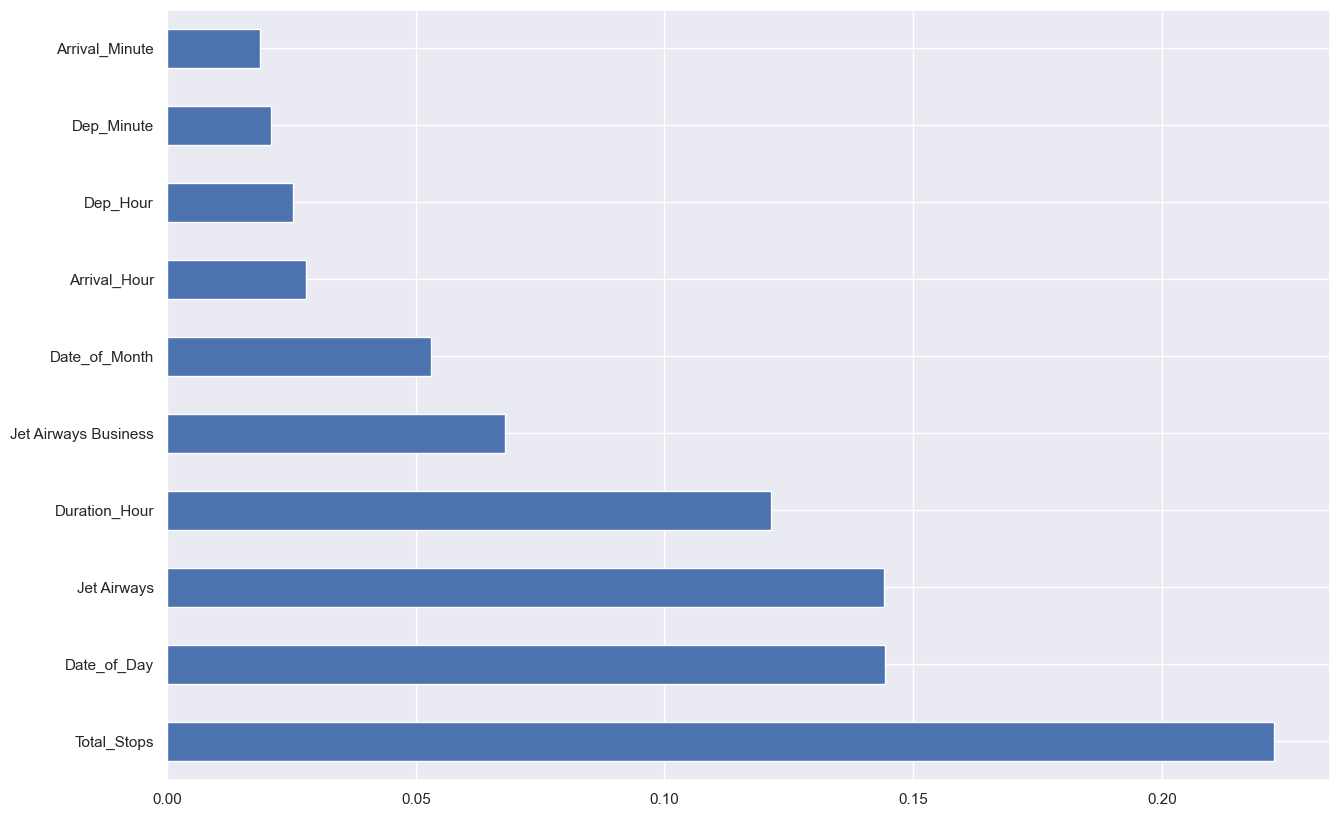

In [166]:
# plot graph of feature importances for better visualization
plt.figure(figsize=(15,10))
fe_importance=pd.Series(selection.feature_importances_,index=x.columns)
fe_importance.nlargest(10).plot(kind='barh')
plt.show()

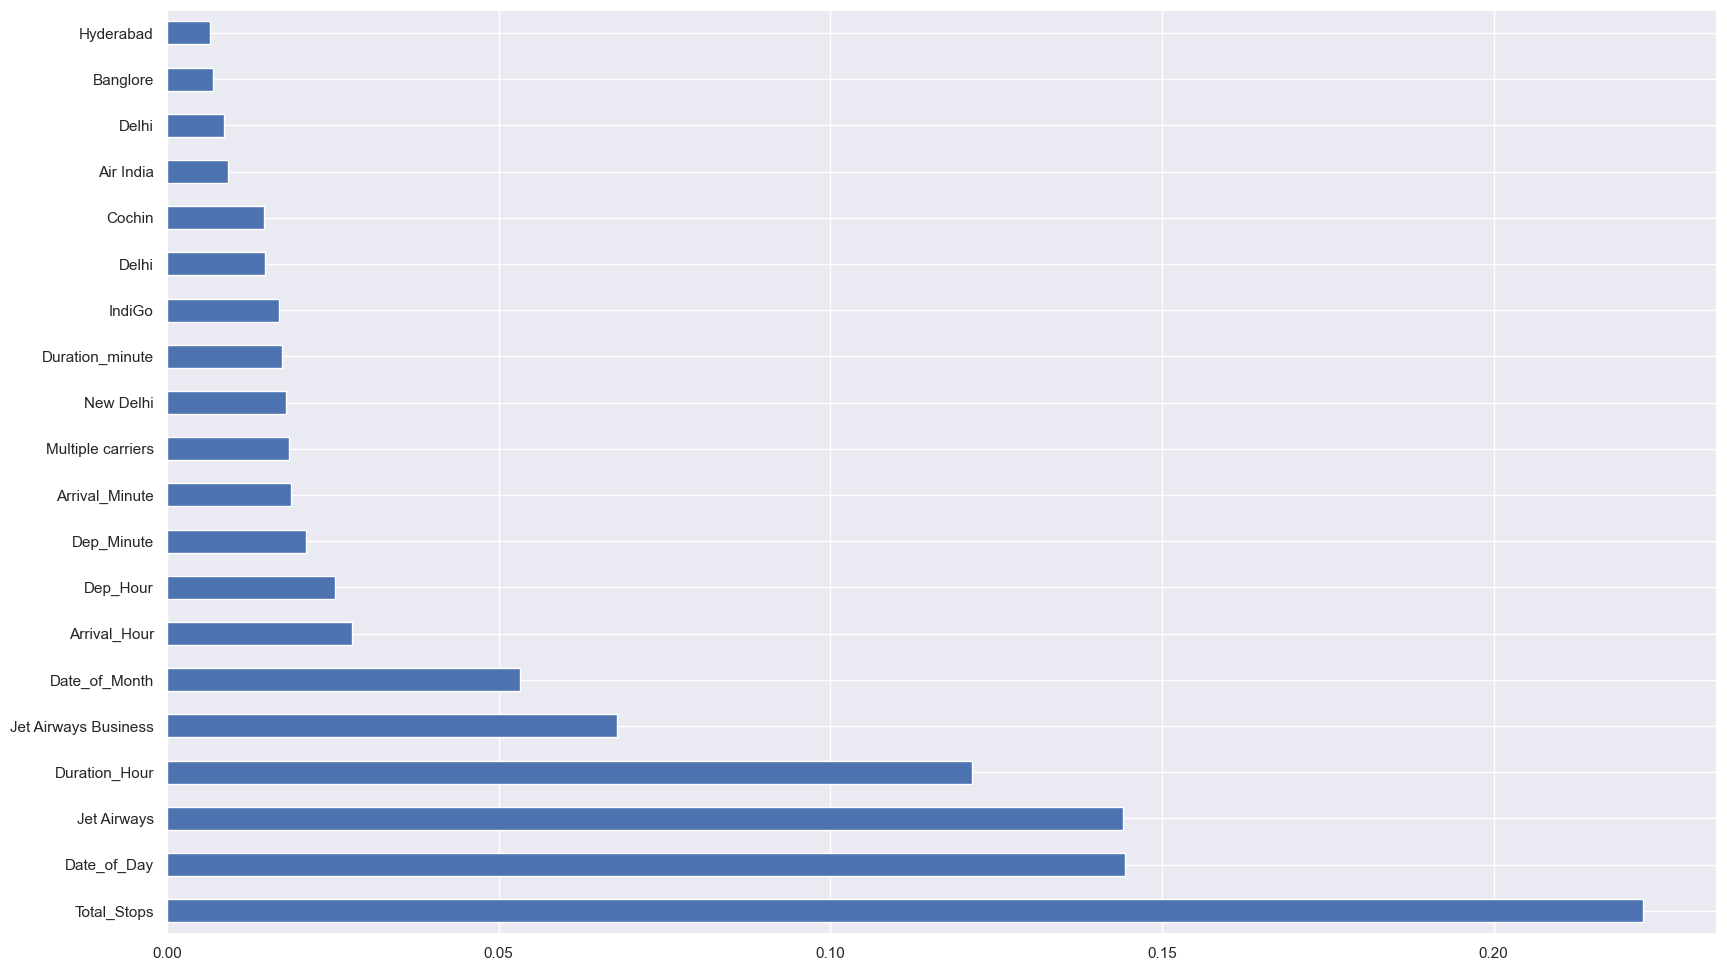

In [167]:
plt.figure(figsize=(20,12))
fe_importance.nlargest(20).plot(kind='barh')
plt.show()

# create training and testing dataset

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# Apply linear regression on training dataset

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [171]:
model.score(x_train,y_train)

0.6205019631282165

In [172]:
model.score(x_test,y_test)

0.6341992965446741

In [173]:
# how try all diffrent regression algorithms and find the testing score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [174]:
model_1=[DecisionTreeRegressor,KNeighborsRegressor,RandomForestRegressor,AdaBoostRegressor,SVR]

for model in model_1:
    reg=model()
    reg= reg.fit(x_train,y_train)
    print(model,'accuracy',reg.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.703966708712004
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.5746972617418812
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.795585997446162
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.36605494372658653
<class 'sklearn.svm._classes.SVR'> accuracy 0.0076546147840766965


# Cross validation technique

In [175]:
from sklearn.model_selection import KFold,cross_val_score

In [176]:
models=[]
models.append(('KNN',KNeighborsRegressor()))
models.append(('Decision_Tree',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('SVM',SVR()))
models.append(('AdaBoost',AdaBoostRegressor()))

results=[]
names=[]

for name,model in models:
    kfold = KFold(n_splits=10,shuffle=False, random_state=None)
    cv_result = cross_val_score(model,x_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.5716100910762429
Decision_Tree 0.7137806555278131
RF 0.8078231162732038
SVM -0.00042022796172279663
AdaBoost 0.3377045049590888


In [177]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [178]:
y_pred=model.predict(x_test)

In [179]:
model.score(x_train,y_train)

0.954437080343462

In [180]:
model.score(x_test,y_test)

0.7979743839129055

# perform the hyper parameter turing using RandomForestRegressor

In [103]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [181]:
# create list for all possible parameter

n_estimators= [int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(z) for z in np.linspace(5,30,6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [182]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [186]:
rf_random=RandomizedSearchCV(estimator=model,
                         param_distributions=random_grid,
                         scoring='neg_mean_squared_error',
                         n_iter=10,cv=5,
                         verbose=2,
                         random_state=42,n_jobs=1)

In [187]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [189]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

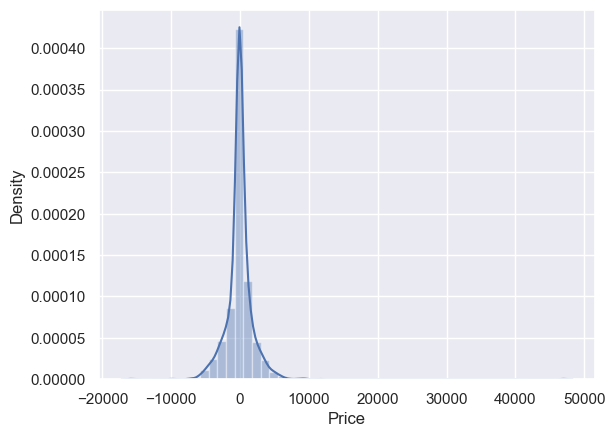

In [191]:
# compare y_test and y_red value using displot
sns.distplot(y_test-y_pred)
plt.show()

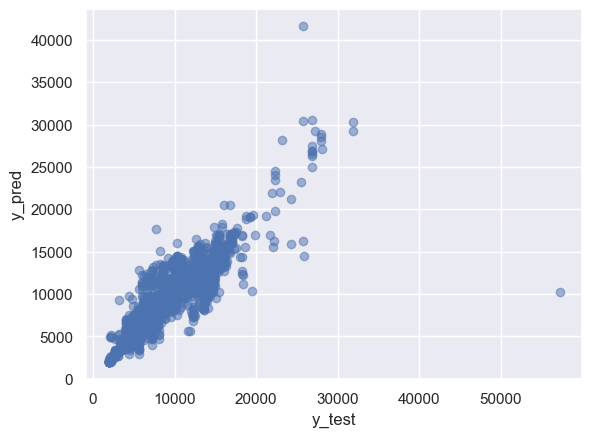

In [192]:
# scatter plot 
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Model evalution 

In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [194]:
# check the mean_absolute_error
mean_absolute_error(y_test,y_pred)

1143.811412804985

In [195]:
# check the mean_squared_error
mean_squared_error(y_test,y_pred)

4265116.520770463

In [197]:
# check the r2_score
r2_score(y_test,y_pred)

0.7979743839129055